### セクション10：　2群の比率差の検定（Z検定）

#### 比率の差の検定（Z-test）

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.api import qqplot

from sklearn.preprocessing import StandardScaler

In [2]:
df = sns.load_dataset('tips')
df['tip_rate'] = df['tip'] / df['total_bill']
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [3]:
proportions_ztest([30, 33], [1000, 1000], alternative='smaller')

(-0.3840618481549573, 0.35046630388746547)

#### 連関の検定（カイ二乗検定）

In [4]:
obs = [[15, 5], [15, 65]]
stats.chi2_contingency(obs, False)

(24.107142857142858,
 9.112167294252327e-07,
 1,
 array([[ 6., 14.],
        [24., 56.]]))

#### Z検定とカイ二乗検定

In [5]:
n = 100
sample_df1 = df.sample(n)
sample_df2 = df.sample(n)

In [6]:
count1 = sample_df1['time'].value_counts()['Dinner']
count2 = sample_df2['time'].value_counts()['Dinner']
print(count1, count2)

71 70


In [7]:
# Z検定
proportions_ztest([count1, count2], [n, n], alternative='two-sided')

(0.15505273658963006, 0.8767797421995006)

In [8]:
sample1_freq = sample_df1['time'].value_counts().values
sample2_freq = sample_df2['time'].value_counts().values
print(sample1_freq, sample2_freq)

[71 29] [70 30]


In [9]:
# カイ二乗検定
stats.chi2_contingency([sample1_freq, sample2_freq], False)

(0.024041351123933165,
 0.8767797421995007,
 1,
 array([[70.5, 29.5],
        [70.5, 29.5]]))

### t検定
 - スチューデントのt検定
 - ウェルチのt検定

In [10]:
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


#### 平均値差の検定

In [11]:
male_tips = df[df['sex']=='Male']['tip_rate']
female_tips = df[df['sex']=='Female']['tip_rate']

In [12]:
print(np.mean(male_tips), np.mean(female_tips))

0.15765054700429748 0.16649073632892475


In [13]:
stats.ttest_ind(male_tips, female_tips, equal_var=True)

Ttest_indResult(statistic=-1.0833972270477996, pvalue=0.2797103849605489)

In [14]:
stats.ttest_ind(male_tips, female_tips, equal_var=False)

Ttest_indResult(statistic=-1.1432770167349968, pvalue=0.2542456188927583)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tip_rate', ylabel='Density'>

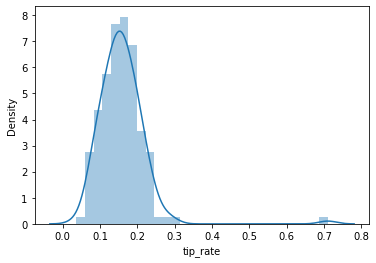

In [15]:
sns.distplot(male_tips)

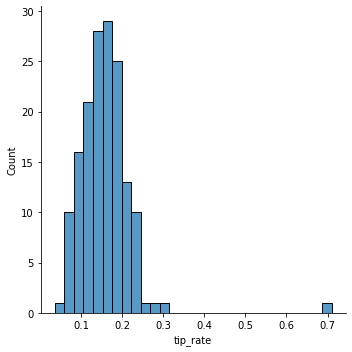

In [17]:
sns.displot(male_tips)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tip_rate', ylabel='Density'>

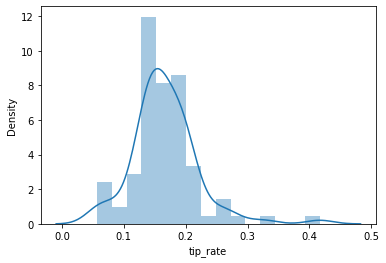

In [18]:
sns.distplot(female_tips)

<AxesSubplot:xlabel='sex', ylabel='tip_rate'>

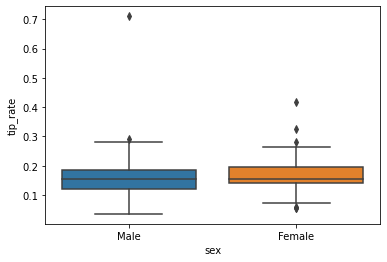

In [19]:
sns.boxplot(data=df, x='sex', y='tip_rate')

In [20]:
print(np.var(male_tips), np.var(female_tips))

0.004169445577529407 0.0028433004255488206


#### Q-Qプロット

In [21]:
male_tipr = df[df['sex']=='Male']['tip_rate']
female_tipr = df[df['sex']=='Female']['tip_rate']

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tip_rate', ylabel='Density'>

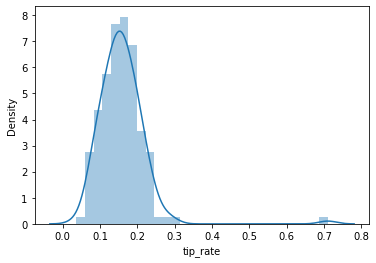

In [22]:
sns.distplot(male_tipr)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tip_rate', ylabel='Density'>

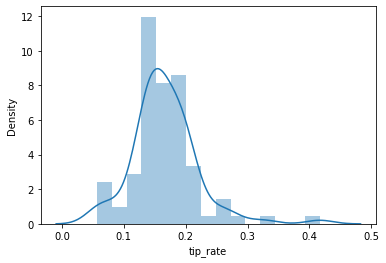

In [23]:
sns.distplot(female_tipr)

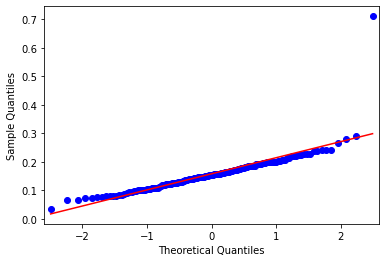

In [24]:
# Q-Qplot
fig = qqplot(male_tipr, line='r')

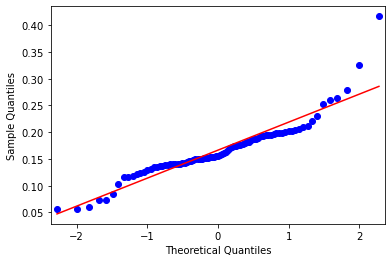

In [25]:
fig = qqplot(female_tipr, line='r')

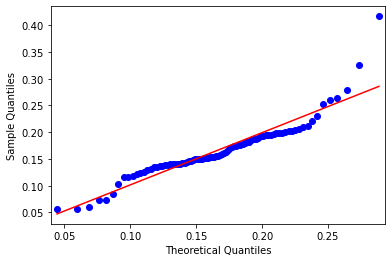

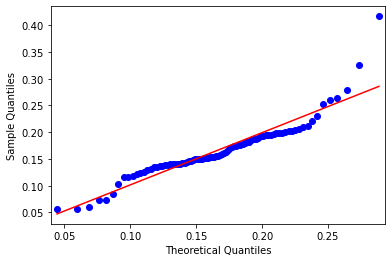

In [26]:
qqplot(female_tipr, line='r',
      dist=stats.norm(loc=np.mean(female_tipr),
                      scale=np.sqrt(stats.tvar(female_tipr))))

### シャピロウィルク検定

In [27]:
stats.shapiro(male_tipr)

ShapiroResult(statistic=0.7447847127914429, pvalue=3.2243281107541917e-15)

In [28]:
stats.shapiro(female_tipr)

ShapiroResult(statistic=0.8982974290847778, pvalue=4.717996489489451e-06)

In [29]:
stats.shapiro(np.sort(male_tipr)[:-1])

ShapiroResult(statistic=0.9931070804595947, pvalue=0.6644759774208069)

In [30]:
stats.shapiro(np.sort(female_tipr)[:-2])

ShapiroResult(statistic=0.9696651697158813, pvalue=0.04252713546156883)

### Ｆ分布

In [31]:
stats.f.pdf(1, dfn=3, dfd=3)

0.31830988618379075

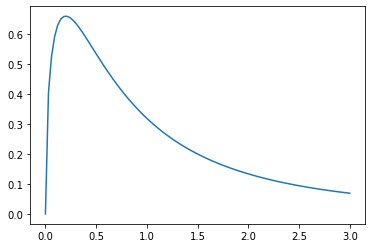

In [32]:
x = np.linspace(0, 3, 100)
y = stats.f.pdf(x, dfn=3, dfd=3)
plt.plot(x, y)

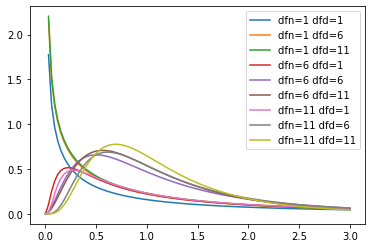

In [33]:
x = np.linspace(0, 3, 100)
for i in range(1, 12, 5):
    for k in range(1, 12, 5):
        y = stats.f.pdf(x, dfn=i, dfd=k)
        plt.plot(x, y, label=f'dfn={str(i)} dfd={str(k)}')
        plt.legend()

### F検定

In [34]:
male_tipr = df[df['sex']=='Male']['tip_rate']
female_tipr = df[df['sex']=='Female']['tip_rate']

In [35]:
print(np.var(male_tipr), np.var(female_tipr))

0.004169445577529407 0.0028433004255488206


In [36]:
n1 = len(male_tipr)
n2 = len(female_tipr)
dfn = n1 - 1
dfd = n2 - 1
var1 = stats.tvar(male_tipr)
var2 = stats.tvar(female_tipr)
f = var1/var2
print(f)

1.4588472200534603


In [37]:
stats.f(dfn=dfn, dfd=dfd).sf(f)

0.027100863454374447

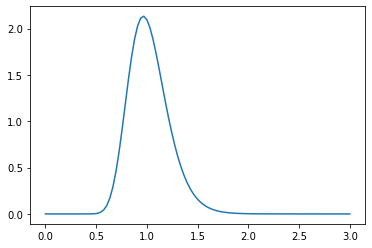

In [38]:
x = np.linspace(0, 3, 100)
y = stats.f(dfn=dfn, dfd=dfd).pdf(x)
plt.plot(x, y)

### 対応ありの平均偏差の検定

In [39]:
pb_df = pd.read_csv('data/blood_pressure.csv')

In [40]:
pb_df

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141
...,...,...,...,...,...
115,116,Female,60+,152,152
116,117,Female,60+,161,152
117,118,Female,60+,165,174
118,119,Female,60+,149,151


In [41]:
stats.ttest_rel(pb_df['bp_before'], pb_df['bp_after'])

Ttest_relResult(statistic=3.3371870510833657, pvalue=0.0011297914644840823)

In [42]:
stats.ttest_rel(pb_df['bp_before'], pb_df['bp_after'], alternative='greater')

Ttest_relResult(statistic=3.3371870510833657, pvalue=0.0005648957322420411)

In [43]:
print(pb_df['bp_before'].mean(), pb_df['bp_after'].mean())

156.45 151.35833333333332


In [44]:
pb_df['delta'] = pb_df['bp_before'] - pb_df['bp_after']

In [45]:
pb_df['delta'].mean()

5.091666666666667

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='delta'>

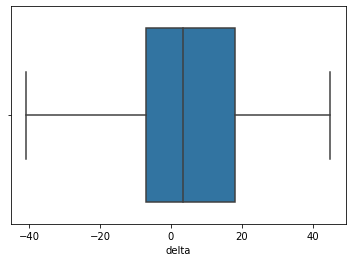

In [46]:
sns.boxplot(pb_df['delta'])